<a href="https://colab.research.google.com/github/ehcdc1967/PROYECTO_INVERSION/blob/main/01_Analisis_Exploratorio_De_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

In [ ]:
os.chdir("F:/A_CIENCIA DE DATOS/13 TESIS/MEF_PORTAL_DE_DATOS_ABIERTOS")

In [ ]:
df = pd.read_parquet("poblacion.parquet")

In [ ]:
df

,CODIGO_UNICO,FUNCION,SOBRECOSTO,TIEMPO_VIABILIDAD,TIEMPO_EJECUCION,BENEFICIARIO,CTRL_CONCURR,MONTO_LAUDO,MONTO_FIANZA,NATURALEZA_MEJORAMIENTO,...,NATURALEZA_TOTAL,MODALIDAD_DIRECTA,MODALIDAD_INDIRECTA,MODIFICACION_F8,EXPEDIENTE_TECNICO,REGISTRADO_PMI,DPTO,TIPO_MUNICIPALIDAD,RATIO_ET_VIABLE,RATIO_ET_COSTO
0,2568264,CULTURA Y DEPORTE,1.0,5.0,89.0,434.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,HUANCAVELICA,G,1.040114,1.022229
1,2546805,"PLANEAMIENTO, GESTIÓN Y RESERVA DE CONTINGENCIA",1.0,1.0,91.0,678.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,AYACUCHO,E,1.670448,0.796145
2,2602787,"PLANEAMIENTO, GESTIÓN Y RESERVA DE CONTINGENCIA",0.0,5.0,61.0,2530.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,SAN MARTIN,F,0.715191,1.000000
3,2548718,TRANSPORTE,1.0,6.0,61.0,720.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,ICA,E,1.000000,0.990071
4,2568329,TRANSPORTE,0.0,0.0,92.0,208800.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,LORETO,F,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50798,2667104,TRANSPORTE,0.0,5.0,61.0,345.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,LIMA,C,0.000000,0.000000
50799,2671672,TRANSPORTE,0.0,0.0,92.0,45350.0,0.0,0.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,0.0,LA LIBERTAD,D,0.000000,0.000000
50800,2671331,TRANSPORTE,0.0,1.0,92.0,59618.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,PIURA,A,0.000000,0.000000
50801,2663222,SANEAMIENTO,0.0,13.0,61.0,128.0,0.0,0.0,0.0,1.0,...,3.0,1.0,0.0,0.0,0.0,0.0,PIURA,G,0.000000,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50803 entries, 0 to 50802
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CODIGO_UNICO             50803 non-null  object  
 1   FUNCION                  50803 non-null  object  
 2   SOBRECOSTO               50803 non-null  float64 
 3   TIEMPO_VIABILIDAD        50803 non-null  float64 
 4   TIEMPO_EJECUCION         50803 non-null  float64 
 5   BENEFICIARIO             50803 non-null  float64 
 6   CTRL_CONCURR             50803 non-null  float64 
 7   MONTO_LAUDO              50803 non-null  float64 
 8   MONTO_FIANZA             50803 non-null  float64 
 9   NATURALEZA_MEJORAMIENTO  50803 non-null  float64 
 10  NATURALEZA_AMPLIACION    50803 non-null  float64 
 11  NATURALEZA_RECUPERACION  50803 non-null  float64 
 12  NATURALEZA_CREACION      50803 non-null  float64 
 13  NATURALEZA_TOTAL         50803 non-null  float64 
 14  MODALI

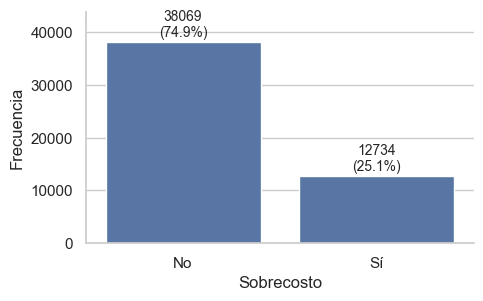

In [ ]:
# Distribución de la variable target (Sobrecostos)
df['SOBRECOSTO_LABEL'] = df['SOBRECOSTO'].map({0: 'No', 1: 'Sí'})
plt.figure(figsize=(5,3))
ax = sns.countplot(x='SOBRECOSTO_LABEL', data=df, order=['No', 'Sí'])
#plt.title('Distribución de Sobrecostos')
plt.xlabel('Sobrecosto')
plt.ylabel('Frecuencia')

# Agregar etiquetas de cantidad y porcentaje en las barras
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{count / len(df) * 100:.1f}%'
    ax.annotate(f'{count}\n({percentage})',
                (p.get_x() + p.get_width() / 2., p.get_height() + 500),
                ha='center', va='bottom', fontsize=10)
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)  # Ajustar límite superior del eje Y
sns.despine()  # Eliminar bordes del gráfico
plt.show()


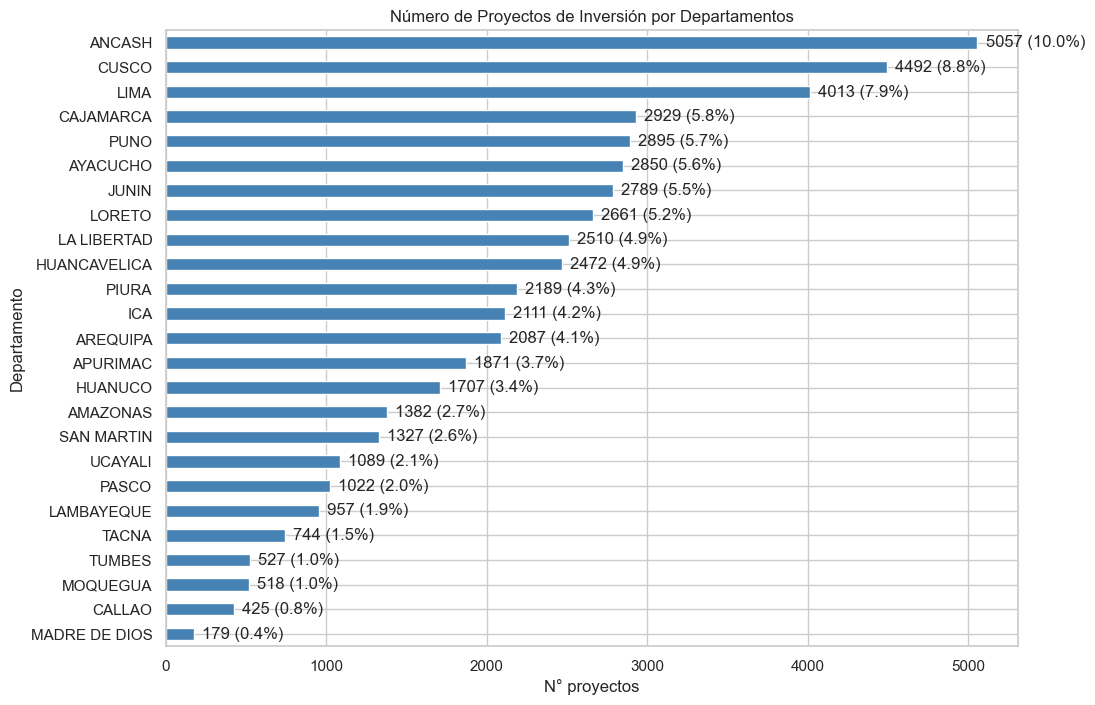

In [ ]:
import matplotlib.pyplot as plt
# Calcular la frecuencia de la variable 'DPTO'
# Calcular la frecuencia de la variable 'DPTO'
dpto_freq = df['DPTO'].value_counts()
total = len(df)
# Crear gráfico de barras horizontal con etiquetas de frecuencia y porcentaje
plt.figure(figsize=(11, 8))
ax = dpto_freq.plot(kind='barh', color='steelblue')
plt.title('Número de Proyectos de Inversión por Departamentos')
plt.xlabel('N° proyectos')
plt.ylabel('Departamento')
plt.gca().invert_yaxis()  # Invertir el eje Y

# Agregar etiquetas con frecuencia y porcentaje
for i, (value, name) in enumerate(zip(dpto_freq.values, dpto_freq.index)):
    percentage = f"{(value / total) * 100:.1f}%"
    plt.text(value + 50, i, f"{value} ({percentage})", va='center')

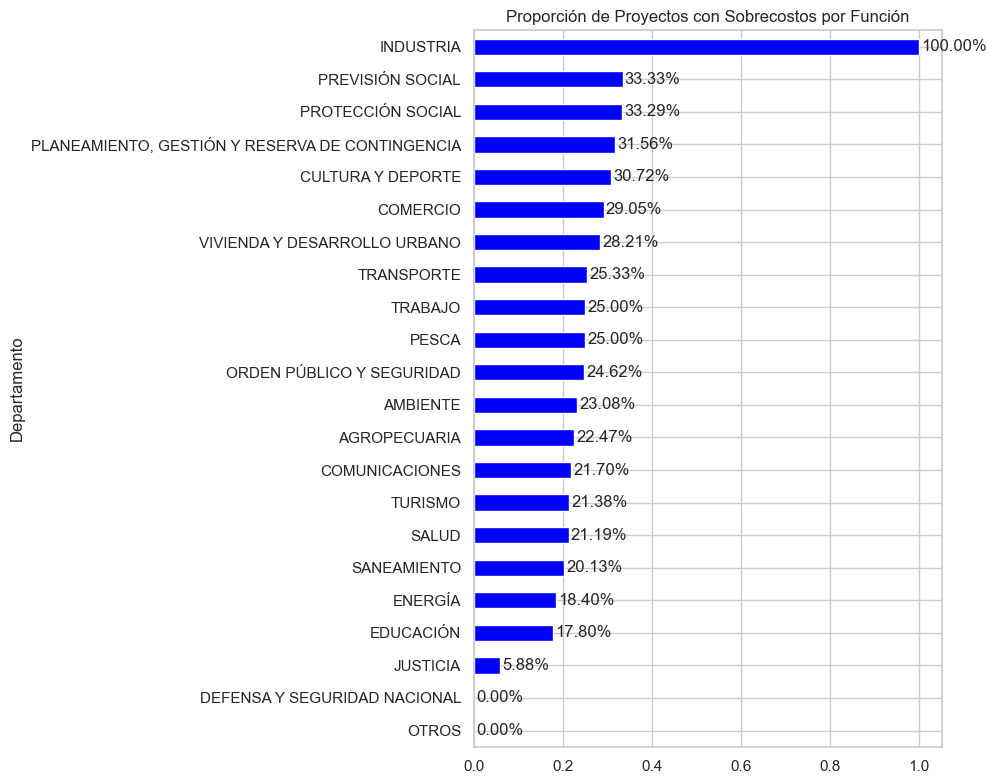

In [ ]:
import matplotlib.pyplot as plt
# Group data by department (DPTO) and calculate the proportion of projects with cost overruns
department_sobrecosto = df.groupby('FUNCION')['SOBRECOSTO'].mean()
# Sort by the proportion of projects with cost overruns
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot the data
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='blue')
plt.title('Proporción de Proyectos con Sobrecostos por Función')
#plt.xlabel('Proporción de Proyectos con Sobrecostos')
plt.ylabel('Departamento')
# Add percentage values on the bars
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
plt.tight_layout()
plt.show()

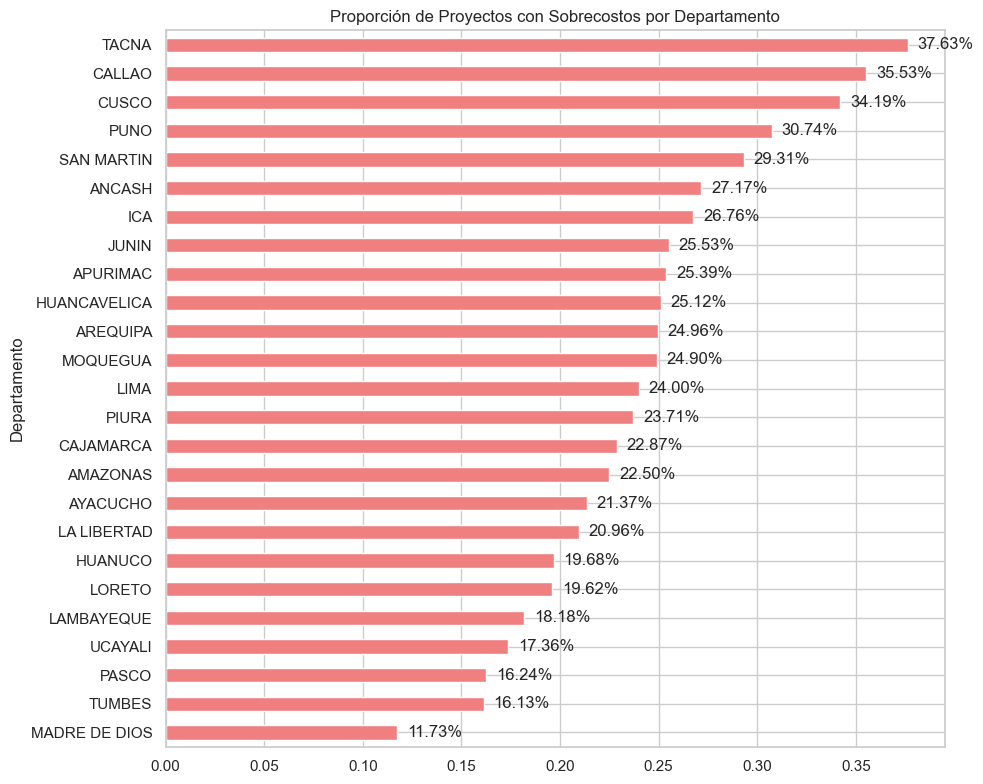

In [ ]:
import matplotlib.pyplot as plt
department_sobrecosto = df.groupby('DPTO')['SOBRECOSTO'].mean()
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Proporción de Proyectos con Sobrecostos por Departamento')
plt.ylabel('Departamento')
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
plt.tight_layout()
plt.show()

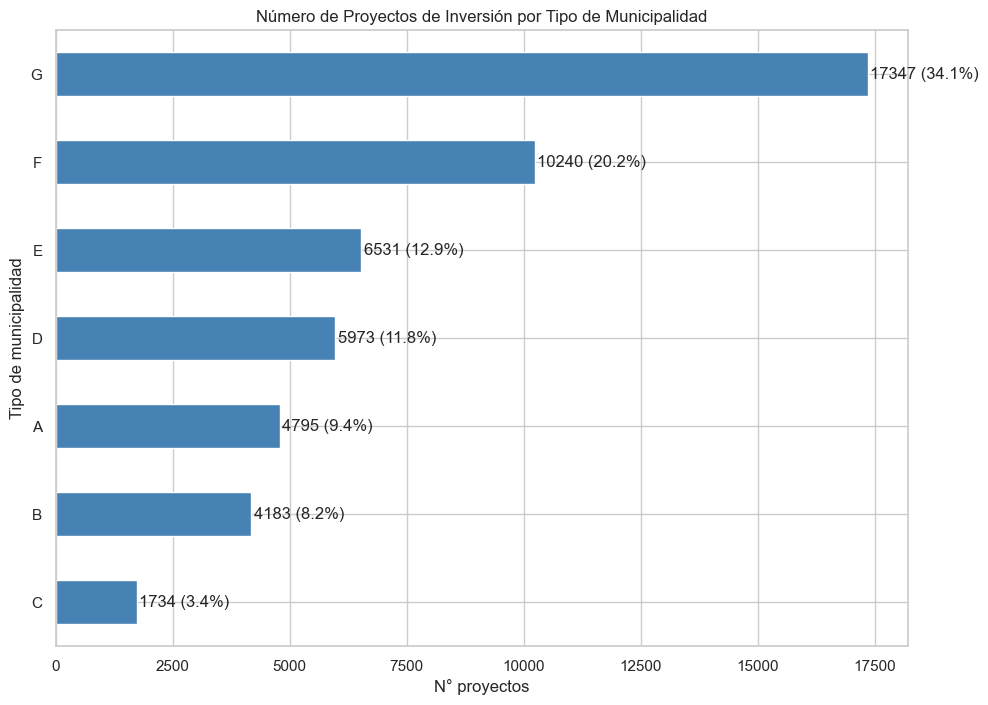

In [ ]:
import matplotlib.pyplot as plt
# Calcular la frecuencia de la variable 'DPTO'
# Calcular la frecuencia de la variable 'DPTO'
dpto_freq = df['TIPO_MUNICIPALIDAD'].value_counts()
total = len(df)
# Crear gráfico de barras horizontal con etiquetas de frecuencia y porcentaje
plt.figure(figsize=(11, 8))
ax = dpto_freq.plot(kind='barh', color='steelblue')
plt.title('Número de Proyectos de Inversión por Tipo de Municipalidad')
plt.xlabel('N° proyectos')
plt.ylabel('Tipo de municipalidad')
plt.gca().invert_yaxis()  # Invertir el eje Y

# Agregar etiquetas con frecuencia y porcentaje
for i, (value, name) in enumerate(zip(dpto_freq.values, dpto_freq.index)):
    percentage = f"{(value / total) * 100:.1f}%"
    plt.text(value + 50, i, f"{value} ({percentage})", va='center')



C:\Users\eduar\AppData\Local\Temp\ipykernel_16224\2125442893.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  department_sobrecosto = df.groupby('TIPO_MUNICIPALIDAD')['SOBRECOSTO'].mean()


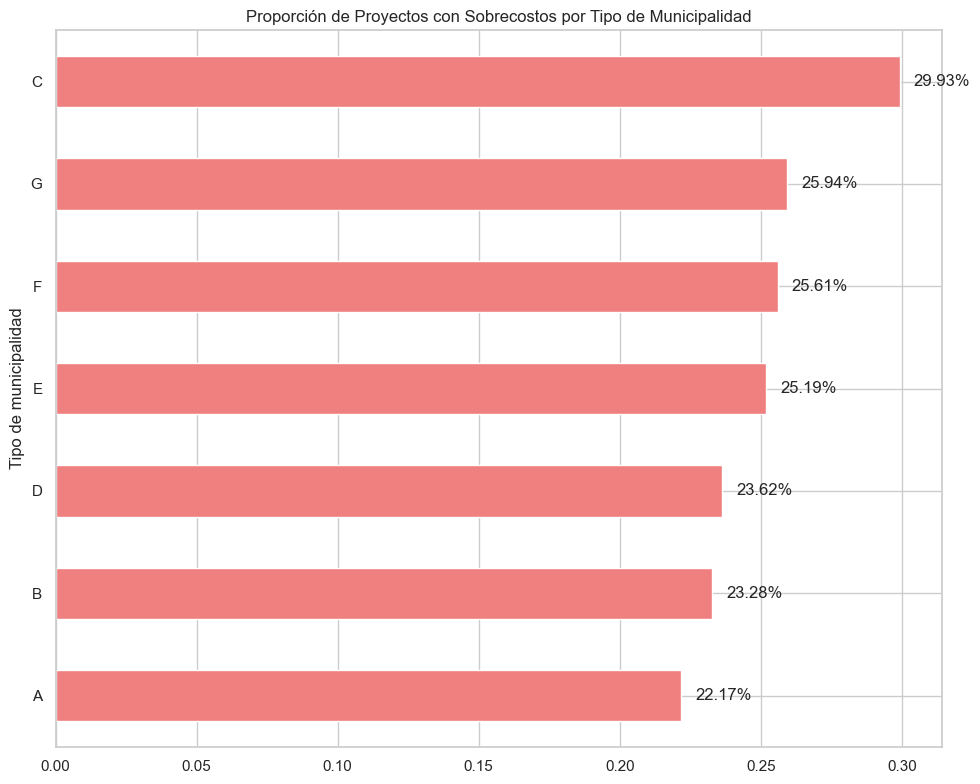

In [ ]:
import matplotlib.pyplot as plt
department_sobrecosto = df.groupby('TIPO_MUNICIPALIDAD')['SOBRECOSTO'].mean()
department_sobrecosto = department_sobrecosto.sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 8))
ax = department_sobrecosto.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Proporción de Proyectos con Sobrecostos por Tipo de Municipalidad')
plt.ylabel('Tipo de municipalidad')
for i, value in enumerate(department_sobrecosto.sort_values()):
    plt.text(value + 0.005, i, f'{value:.2%}', va='center')
plt.tight_layout()
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_16224\2154643388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=detalle, x='DEPARTAMENTO', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")


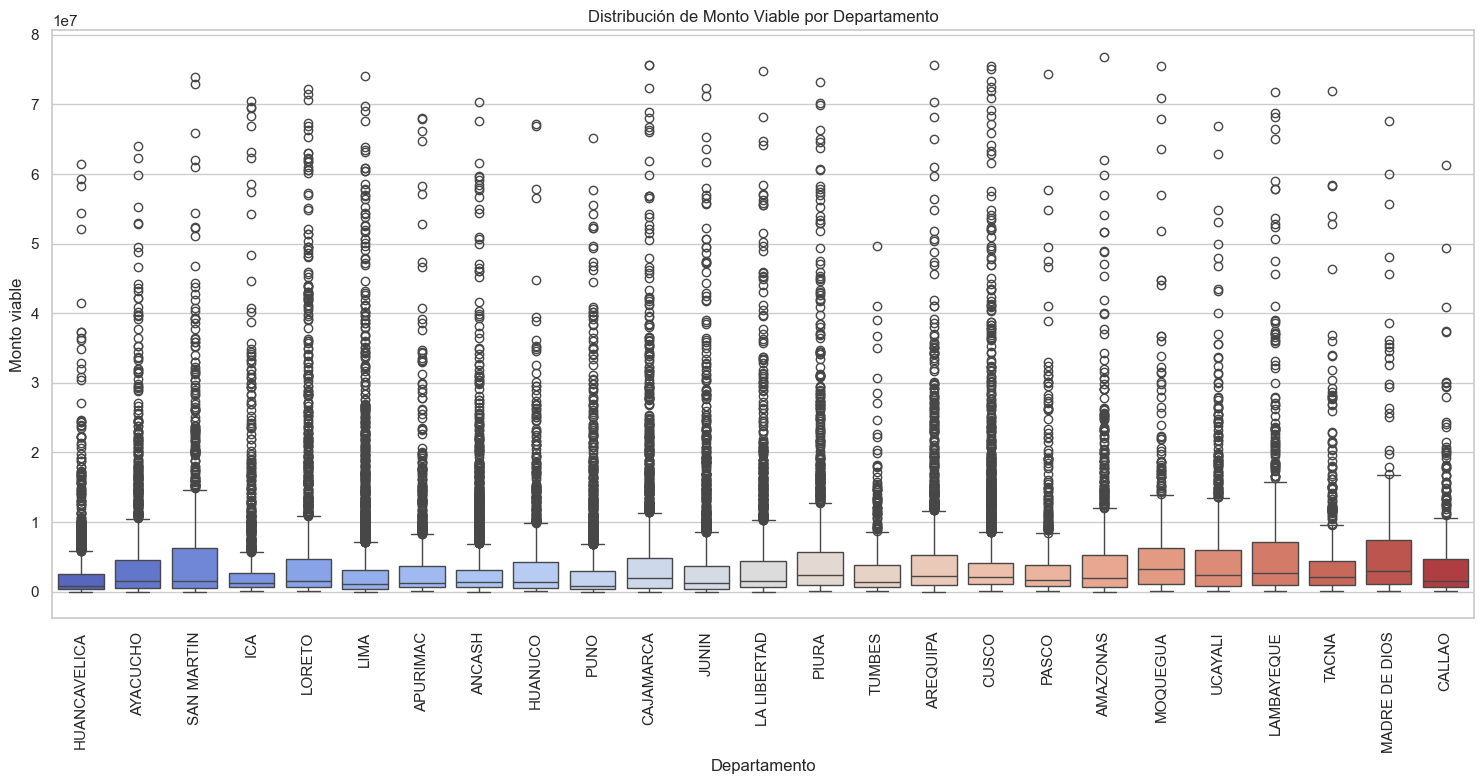

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar el archivo Parquet
detalle = pd.read_parquet('detalle.parquet')
plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='DEPARTAMENTO', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_16224\1162135531.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=detalle, x='FUNCION', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")


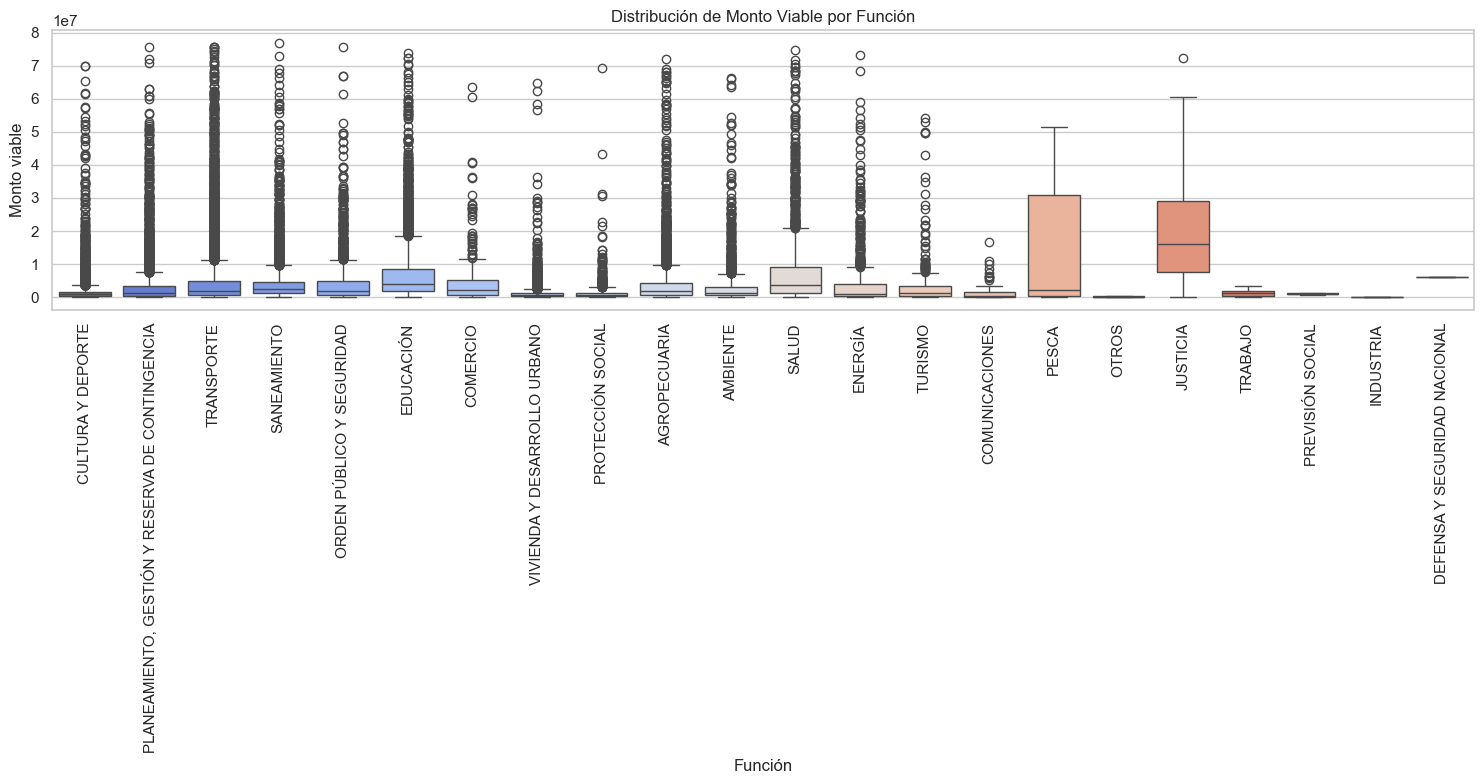

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar el archivo Parquet
detalle = pd.read_parquet('detalle.parquet')
plt.figure(figsize=(15, 8))
sns.boxplot(data=detalle, x='FUNCION', y='MONTO_VIABLE', showfliers=True, palette="coolwarm")
plt.xticks(rotation=90)  # Rotar etiquetas de departamentos para mejor visualización
plt.title('Distribución de Monto Viable por Función')
plt.xlabel('Función')
plt.ylabel('Monto viable')
plt.tight_layout()
plt.show()

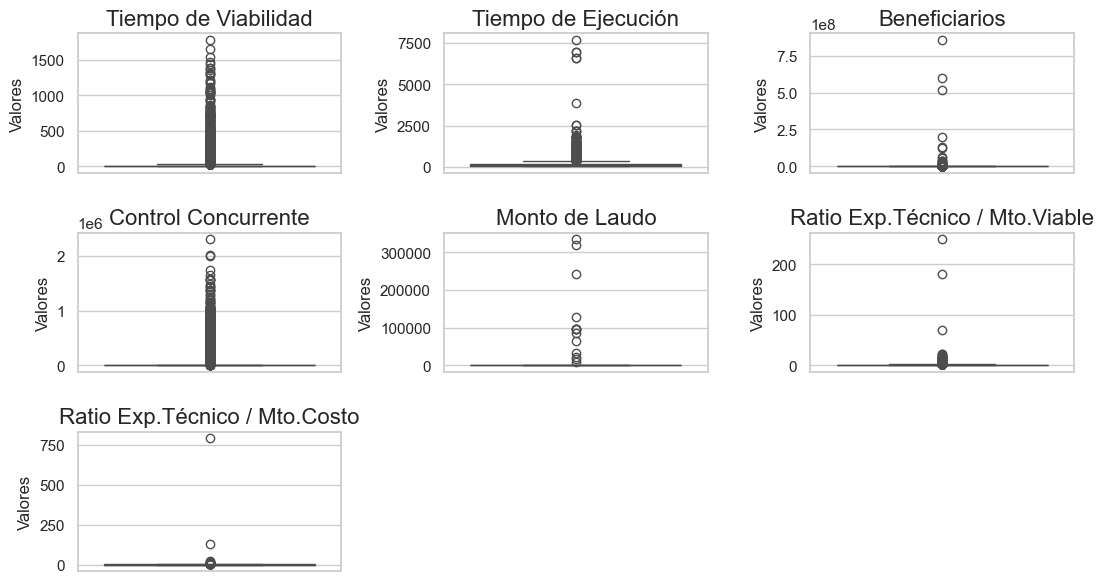

In [ ]:
# Ajustar la cuadrícula al número exacto de columnas
df1 = df.loc[:,['TIEMPO_VIABILIDAD', 'TIEMPO_EJECUCION', 'BENEFICIARIO','CTRL_CONCURR', 'MONTO_LAUDO', 'RATIO_ET_VIABLE', 'RATIO_ET_COSTO']]

titulo = ['Tiempo de Viabilidad', 'Tiempo de Ejecución', 'Beneficiarios', 'Control Concurrente','Monto de Laudo','Ratio Exp.Técnico / Mto.Viable', 'Ratio Exp.Técnico / Mto.Costo']

num_columns = len(df1.columns)

rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calcular filas necesarias para acomodar todos los gráficos

fig, axes = plt.subplots(rows, 3, figsize=(11, rows * 2))  # Crear una cuadrícula dinámica
axes = axes.flatten()  # Aplanar para indexar fácilmente

# Generar gráficos de cajas para cada columna
for i, col in enumerate(df1.columns):
    sns.boxplot(data=numeric_data[col], ax=axes[i], color='orange')
    axes[i].set_title(titulo[i], fontsize=16)
    axes[i].set_ylabel('Valores')

# Eliminar subgráficos vacíos si hay menos columnas que la cuadrícula
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# El estado se ha reiniciado, por lo que es necesario cargar de nuevo los datos y librerías.
import pandas as pd
import numpy as np
# Seleccionar variables numéricas
df2 = df.loc[:,['TIEMPO_VIABILIDAD', 'TIEMPO_EJECUCION', 'BENEFICIARIO','CTRL_CONCURR', 'MONTO_LAUDO', 'RATIO_ET_VIABLE', 'RATIO_ET_COSTO']]

# Seleccionar las variables numéricas para el análisis
numeric_data = df.loc[:, ['TIEMPO_VIABILIDAD', 'TIEMPO_EJECUCION', 'BENEFICIARIO',
                          'CTRL_CONCURR', 'MONTO_LAUDO', 'RATIO_ET_VIABLE', 'RATIO_ET_COSTO']]

# Calcular estadísticas descriptivas para las variables numéricas
summary_statistics = numeric_data.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T

# Calcular el Rango Intercuartílico (IQR)
summary_statistics['IQR'] = summary_statistics['75%'] - summary_statistics['25%']

# Calcular límites inferior y superior para identificar outliers (usando 1.5 * IQR)
summary_statistics['Lower Bound'] = summary_statistics['25%'] - 1.5 * summary_statistics['IQR']
summary_statistics['Upper Bound'] = summary_statistics['75%'] + 1.5 * summary_statistics['IQR']

# Contar el número de outliers por variable (por debajo y por encima de los límites)
summary_statistics['Outliers Below'] = numeric_data.apply(
    lambda x: (x < summary_statistics.loc[x.name, 'Lower Bound']).sum()
)
summary_statistics['Outliers Above'] = numeric_data.apply(
    lambda x: (x > summary_statistics.loc[x.name, 'Upper Bound']).sum()
)

# Agregar el total de outliers
summary_statistics['Total Outliers'] = summary_statistics['Outliers Below'] + summary_statistics['Outliers Above']

# Mostrar las estadísticas descriptivas con el conteo de outliers
print("Estadísticas Descriptivas con Conteo de Outliers:")
print(summary_statistics[['mean', 'min', '25%', '50%', '75%', 'Total Outliers']])



Estadísticas Descriptivas con Conteo de Outliers:
                           mean   min    25%    50%       75%  Total Outliers
TIEMPO_VIABILIDAD     17.176308   0.0    0.0    3.0    12.000            6379
TIEMPO_EJECUCION     176.690255  28.0   61.0   92.0   183.000            4953
BENEFICIARIO       65882.511131   0.0  160.0  462.0  1872.500            5663
CTRL_CONCURR       10363.456454   0.0    0.0    0.0     0.000            2272
MONTO_LAUDO           32.188450   0.0    0.0    0.0     0.000              14
RATIO_ET_VIABLE        0.497588   0.0    0.0    0.0     1.000             603
RATIO_ET_COSTO         0.414513   0.0    0.0    0.0     0.981              57


**MATRIZ DE CORRELACIONES ENTRE VARIABLES NUMÉRICAS**

* El análisis de la matriz de correlaciones permite observar la relación lineal entre las variables numéricas, cuyos valores van de -1 a 1 según se muestra en el siguiente gráfico:

Correlación entre Variables Numéricas:


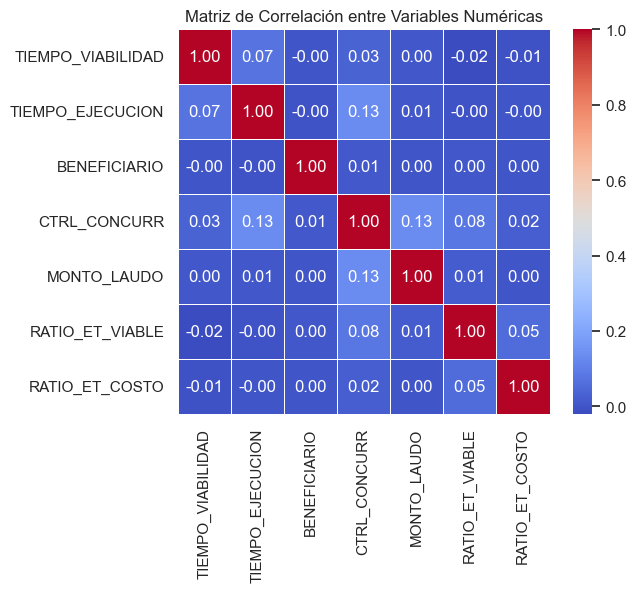

In [ ]:
# MATRIZ DE CORRELACIÓN
print("Correlación entre Variables Numéricas:")
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

Se aprecia una baja correlación general, puesto que no se identifican relaciones fuertes entre ninguna de las variables numéricas. Esto indica que las variables son bastante independientes entre sí, y dado esto, las variables pueden ser utilizadas de manera independiente en modelos predictivos.

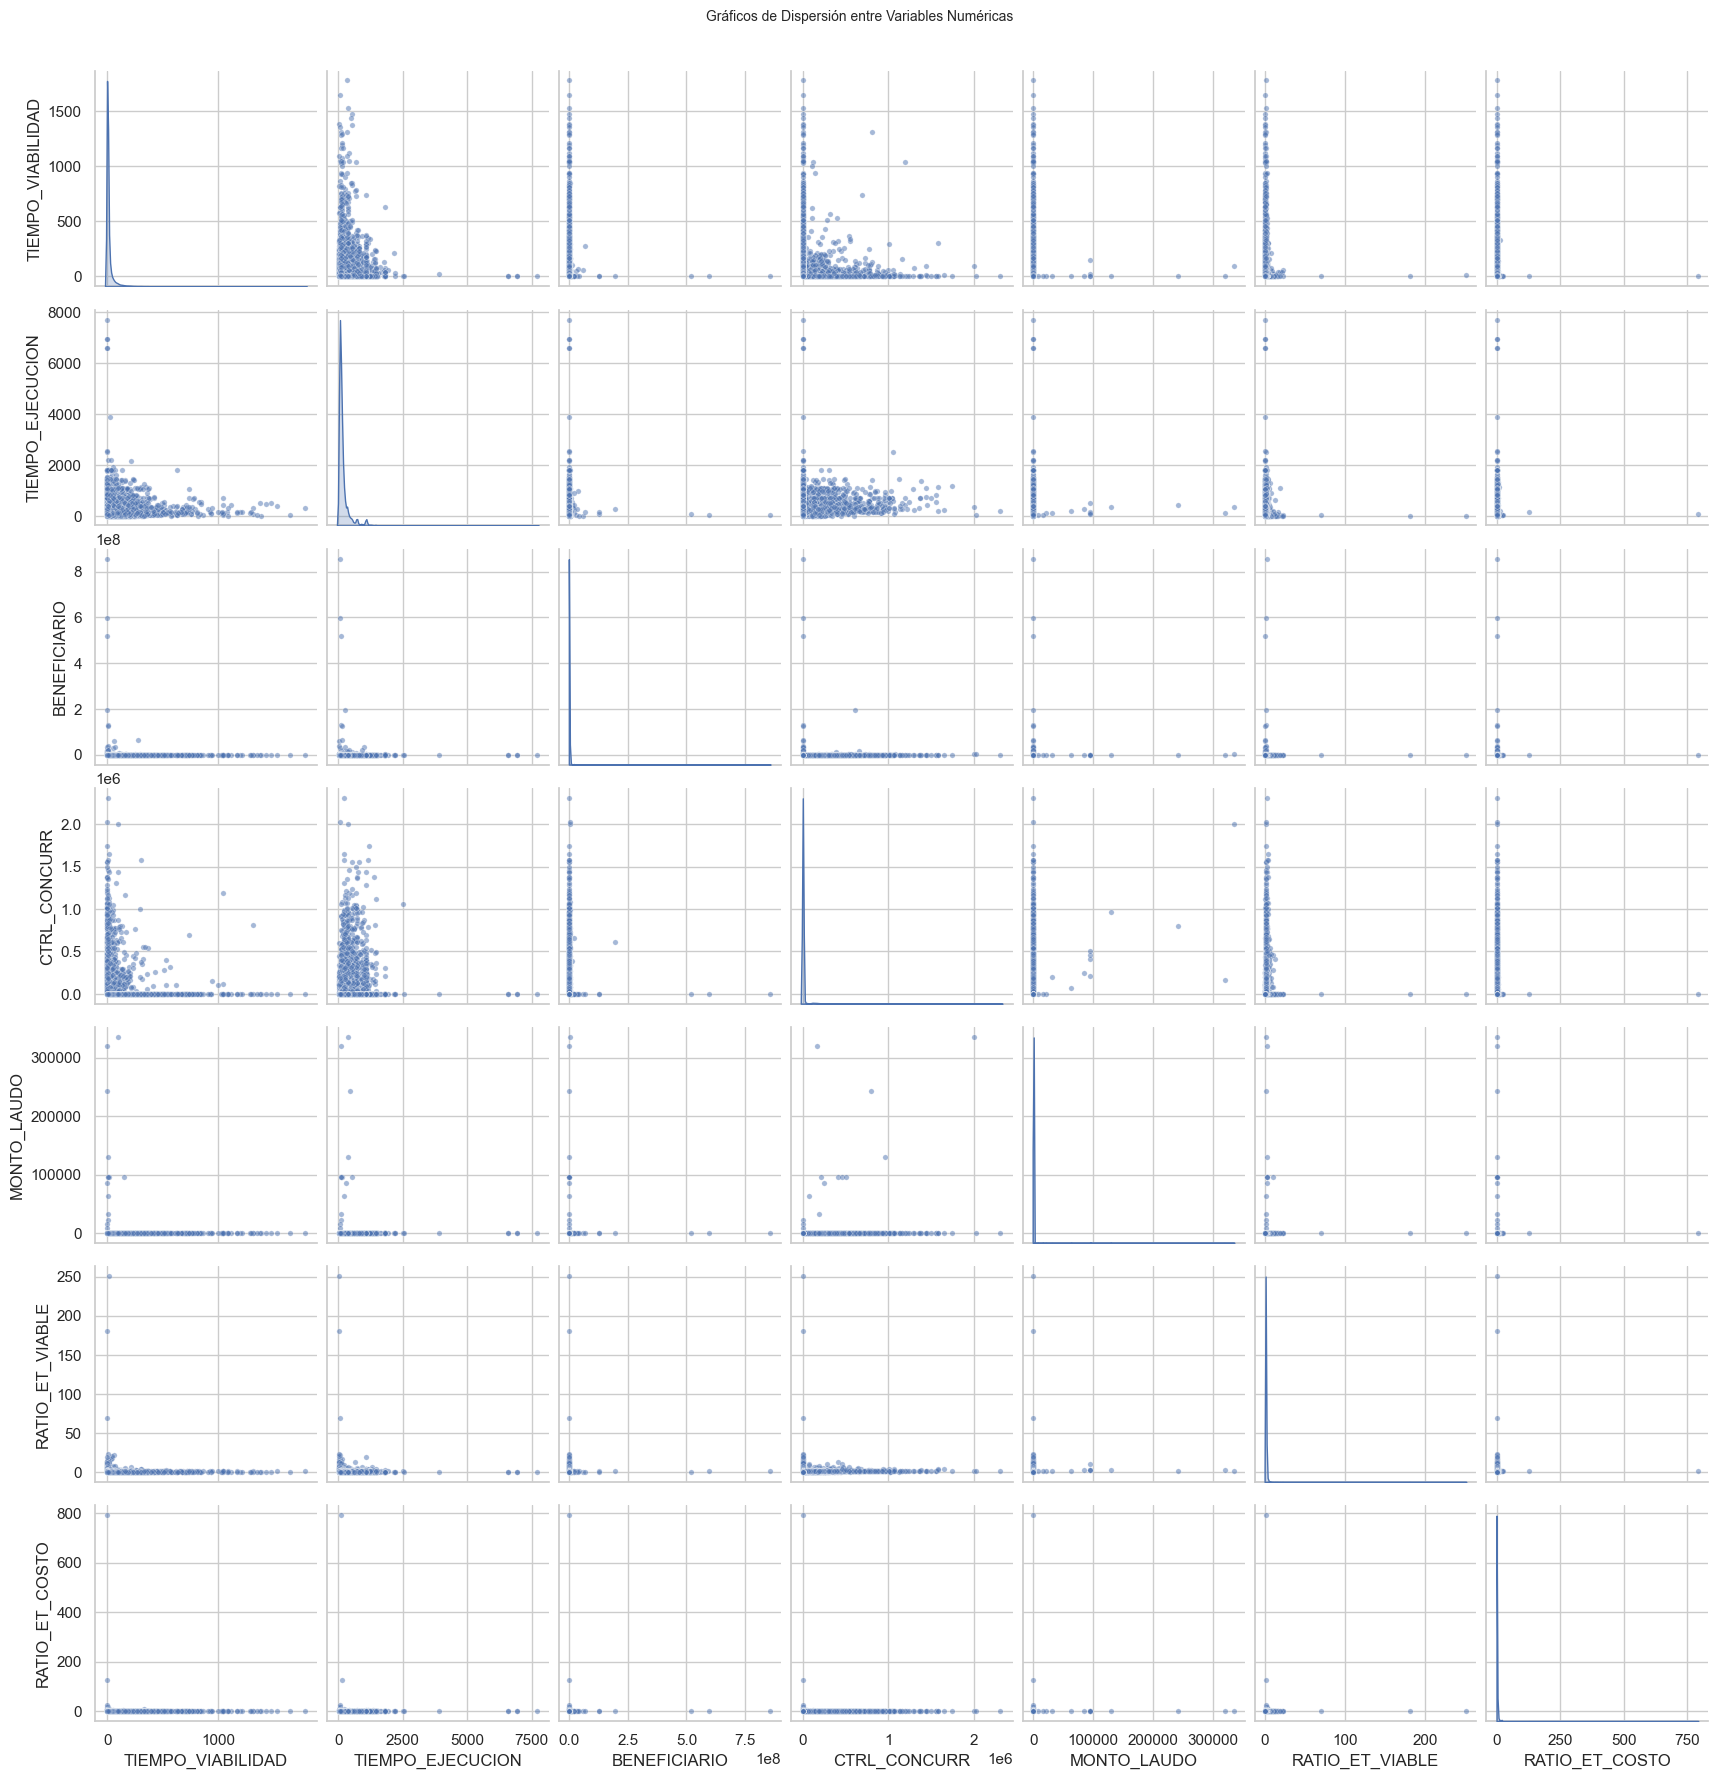

In [ ]:
# Seleccionar variables numéricas
numeric_data = df.loc[:, ['TIEMPO_VIABILIDAD', 'TIEMPO_EJECUCION', 'BENEFICIARIO','CTRL_CONCURR', 'MONTO_LAUDO', 'RATIO_ET_VIABLE', 'RATIO_ET_COSTO']]

# Crear una matriz de gráficos de dispersión
sns.pairplot(numeric_data, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 15})
plt.suptitle("Gráficos de Dispersión entre Variables Numéricas", y=1.02, fontsize=10)
plt.show()

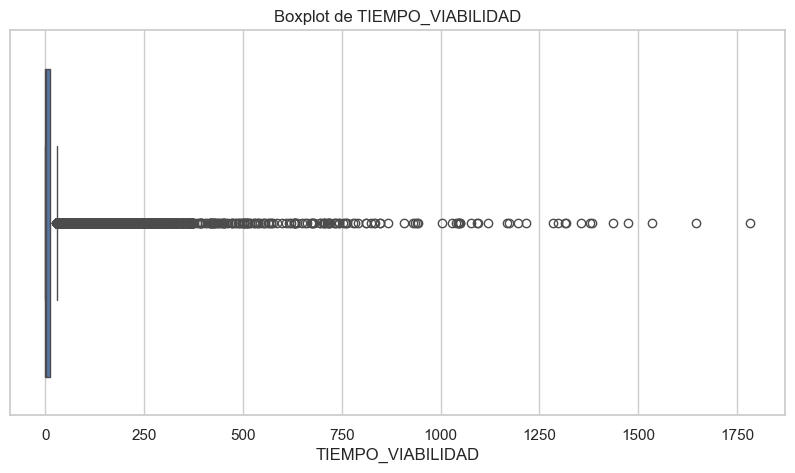

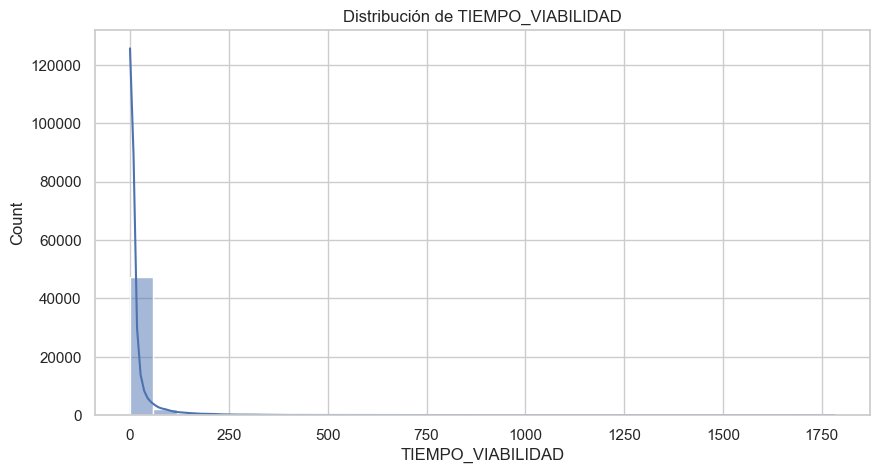

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TIEMPO_VIABILIDAD'])
plt.title('Boxplot de TIEMPO_VIABILIDAD')
plt.show()

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(df['TIEMPO_VIABILIDAD'], kde=True, bins=30)
plt.title('Distribución de TIEMPO_VIABILIDAD')
plt.show()


In [ ]:
from scipy.stats import zscore

df['z_score'] = zscore(df['TIEMPO_VIABILIDAD'])
outliers_z = df[abs(df['z_score']) > 3]
print("Número de outliers (z-score):", len(outliers_z))


Número de outliers (z-score): 770
